In [1]:
!git clone https://github.com/LukasWolff2002/TAREA_2_FINITE

Cloning into 'TAREA_2_FINITE'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (272/272), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 272 (delta 124), reused 238 (delta 90), pack-reused 0 (from 0)
Receiving objects: 100% (272/272), 93.36 KiB | 682.00 KiB/s, done.
Resolving deltas: 100% (124/124), done.


In [2]:
%cd TAREA_2_FINITE/ENTREGA_1/

/content/TAREA_2_FINITE/ENTREGA_1


In [3]:
from nodes import Node
from cst import CST
from section import Section
import numpy as np

Se probará el ejemplo de la sección 15.3.6 del Capítulo 15.
Para este ejemplo, se restringieron los movimientos del nodo 1 y el desplazamiento en y del nodo 2 para poder realizar las operaciones matriciales, dado que el elemento no puede rotar. Además, se aplicó una fuerza de cuerpo en un punto cualquiera dentro del elemento, dando como resultado la redistribución de esfuerzos mayores a los nodos más cercanos al punto de carga.


CST Element 1
Type: planeStress
Nodes:
  Node 1: (0.0, 0.0) DOFs: [0 1]
  Node 2: (3.0, 1.0) DOFs: [2 3]
  Node 3: (2.0, 2.0) DOFs: [4 5]

DOF indices: [0 1 2 3 4 5]
Area: 2.0000

XY matrix:
 [[0. 0.]
 [3. 1.]
 [2. 2.]]
Centroid: [1.66666667 1.        ]

Matrix B:
 [[-0.25  0.    0.5   0.   -0.25  0.  ]
 [ 0.   -0.25  0.   -0.5   0.    0.75]
 [-0.25 -0.25 -0.5   0.5   0.75 -0.25]]

Stiffness Matrix Ke:
 [[  6.   3.  -4.  -2.  -2.  -1.]
 [  3.   6.   2.   4.  -5. -10.]
 [ -4.   2.  24. -12. -20.  10.]
 [ -2.   4. -12.  24.  14. -28.]
 [ -2.  -5. -20.  14.  22.  -9.]
 [ -1. -10.  10. -28.  -9.  38.]]

Fuerza puntual en punto interno del elemento:
Ubicación: (2.00, 1.50)
Fuerza: [0, -1000]
Fuerzas nodales equivalentes: [   0. -125.    0. -250.    0. -625.]

Desplazamientos por nodo:
Nodo 1: ux = 0.0000e+00 m, uy = 0.0000e+00 m
Nodo 2: ux = 5.7870e+00 m, uy = 0.0000e+00 m
Nodo 3: ux = -2.3148e+00 m, uy = -1.8519e+01 m


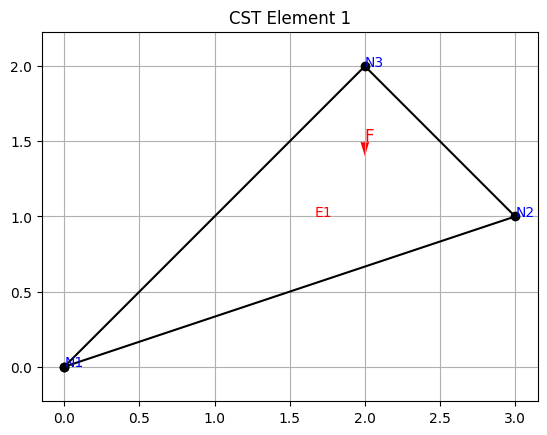

In [7]:
# Nodos
node1 = Node(1, 0.0, 0.0, [0, 1], restrain=[1, 1]) #Restricciones para no hacerlo mecanismo
node2 = Node(2, 3.0, 1.0, [2, 3], restrain=[0, 1])
node3 = Node(3, 2.0, 2.0, [4, 5], restrain=[0, 0])
nodes = [node1, node2, node3]

# Sección
E = 8*np.array([[4,1,0], [1,4,0],[0,0,2]])
t = 1 # Espesor de la sección
section = Section(thickness=t, E=E, nu=0.3)

# Elemento CST
element = CST(1, [node1, node2, node3], section)

# Imprimir resumen
element.printSummary()
# Aplicar una fuerza puntual como carga interna en punto (2.0, 1.5) cualquiera
F_interna = element.apply_point_body_force(x=2.0, y=1.5,force_vector=[0, -1000], use_centroid=False)

# Resolver con esta fuerza
u, f, K = element.ensamblar_y_resolver(F_interna, nodes)

u.flatten(), f.flatten(), K

# Mostrar desplazamientos por nodo
print("\nDesplazamientos por nodo:")
for node in nodes:
    ux = u[node.dofs[0]][0]
    uy = u[node.dofs[1]][0]
    print(f"Nodo {node.id}: ux = {ux:.4e} m, uy = {uy:.4e} m")

"""
Los desplazamientos son de gran magnitud porque solo se tiene un nodo restringido, la fuerza es muy grande y el
módulo de elasticidad es muy bajo.
"""


element.plotGeometry()

Ahora, se probará el ejercicio 15.5 del mismo capítulo.
En este caso, se modificó la matriz de elasticidad para analizar como varía la rigidez del elemento y como cambian las deformaciones de este. Así mismo, se aplicó una *body force*, pero en el centroide del elemento. Esto dió una distribución homogénea de los esfuerzos nodales, ya que se debe cumplir con la restricción de las variables ξ.


CST Element 1
Type: planeStress
Nodes:
  Node 1: (0.0, 0.0) DOFs: [0 1]
  Node 2: (3.0, 1.0) DOFs: [2 3]
  Node 3: (2.0, 2.0) DOFs: [4 5]

DOF indices: [0 1 2 3 4 5]
Area: 2.0000

XY matrix:
 [[0. 0.]
 [3. 1.]
 [2. 2.]]
Centroid: [1.66666667 1.        ]

Matrix B:
 [[-0.25  0.    0.5   0.   -0.25  0.  ]
 [ 0.   -0.25  0.   -0.5   0.    0.75]
 [-0.25 -0.25 -0.5   0.5   0.75 -0.25]]

Stiffness Matrix Ke:
 [[ 18.75    9.375 -12.5    -6.25   -6.25   -3.125]
 [  9.375  18.75    6.25   12.5   -15.625 -31.25 ]
 [-12.5     6.25   75.    -37.5   -62.5    31.25 ]
 [ -6.25   12.5   -37.5    75.     43.75  -87.5  ]
 [ -6.25  -15.625 -62.5    43.75   68.75  -28.125]
 [ -3.125 -31.25   31.25  -87.5   -28.125 118.75 ]]

Fuerza puntual en punto interno del elemento:
Ubicación: (1.67, 1.00)
Fuerza: [0, -1000]
Fuerzas nodales equivalentes: [   0.   -333.33    0.   -333.33    0.   -333.33]

Desplazamientos por nodo:
Nodo 1: ux = 0.0000e+00 m, uy = 0.0000e+00 m
Nodo 2: ux = 9.8765e-01 m, uy = 0.0000e+00 

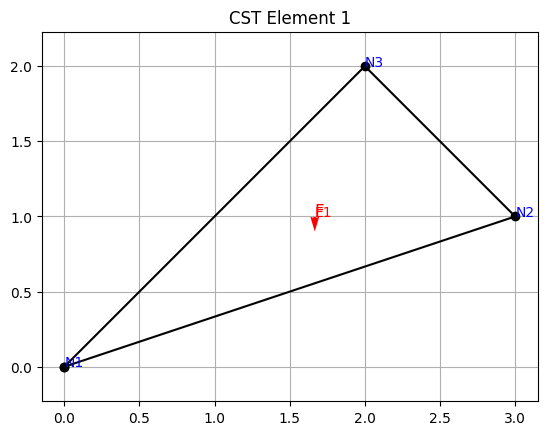

In [8]:
# Nodos
node1 = Node(1, 0.0, 0.0, [0, 1], restrain=[1, 1]) #Restricciones para no hacerlo mecanismo
node2 = Node(2, 3.0, 1.0, [2, 3], restrain=[0, 1])
node3 = Node(3, 2.0, 2.0, [4, 5], restrain=[0, 0])
nodes = [node1, node2, node3]

# Sección
E = np.array([[100,25,0],[25,100,0],[0,0,50]])
t = 1 # Espesor de la sección
section = Section(thickness=t, E=E, nu=0.3)

# Elemento CST
element = CST(1, [node1, node2, node3], section)

# Imprimir resumen
element.printSummary()
# Aplicar una fuerza puntual como carga interna en punto (2.0, 1.5) cualquiera
F_interna = element.apply_point_body_force(x=2.0, y=1.5,force_vector=[0, -1000], use_centroid=True)

# Resolver con esta fuerza
u, f, K = element.ensamblar_y_resolver(F_interna, nodes)

u.flatten(), f.flatten(), K

# Mostrar desplazamientos por nodo
print("\nDesplazamientos por nodo:")
for node in nodes:
    ux = u[node.dofs[0]][0]
    uy = u[node.dofs[1]][0]
    print(f"Nodo {node.id}: ux = {ux:.4e} m, uy = {uy:.4e} m")

"""
Los desplazamientos son de gran magnitud porque solo se tiene un nodo restringido, la fuerza es muy grande y el
módulo de elasticidad es muy bajo.
"""


element.plotGeometry()